<a href="https://colab.research.google.com/github/Mamidalarajesh/Student-record-system.m/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
text=pd.read_csv("https://raw.githubusercontent.com/rkmishracs/dataset/main/advertising.csv")
text


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
text.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
text.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
text.shape


(200, 4)

In [8]:
text.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
text.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
text.Sales

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


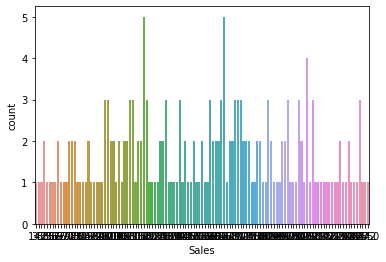

In [11]:
sns.countplot(text.Sales)

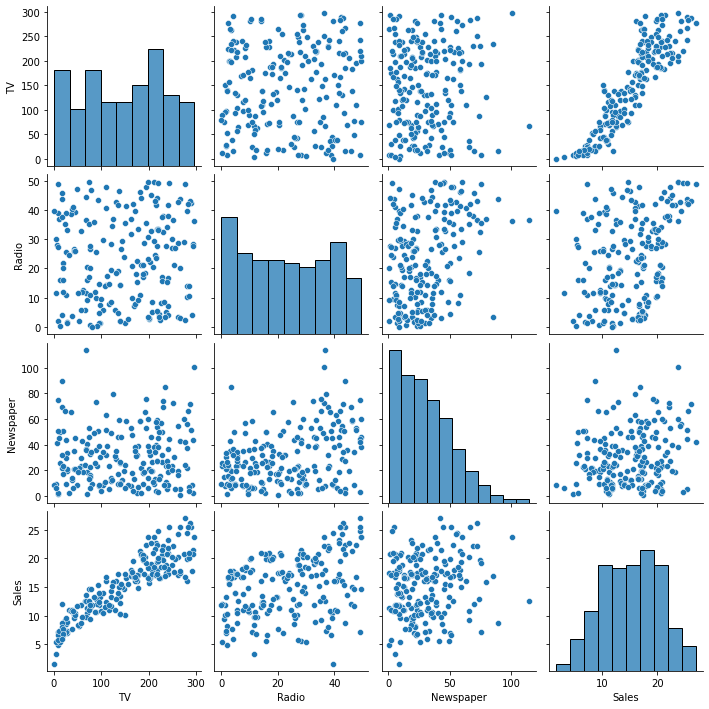

In [12]:
sns.pairplot(text)

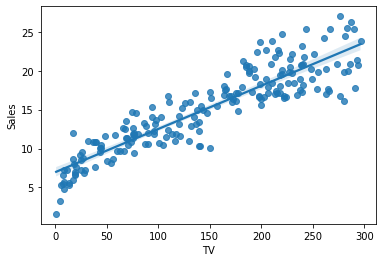

In [13]:
sns.regplot(x='TV',y='Sales',data=text)

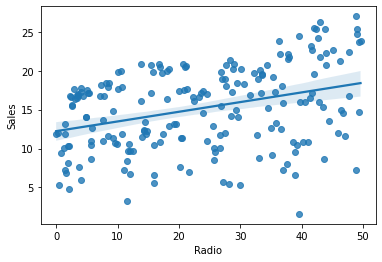

In [14]:
sns.regplot(x='Radio',y='Sales',data=text)


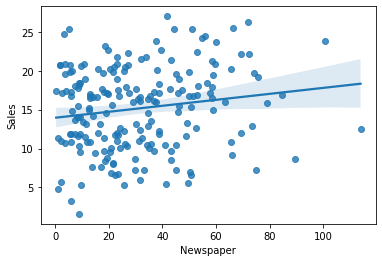

In [15]:
sns.regplot(x='Newspaper',y='Sales',data=text)

In [16]:
text.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


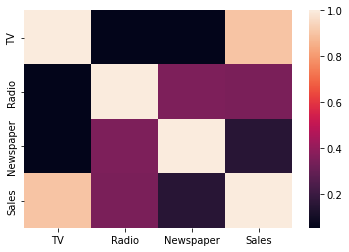

In [17]:
sns.heatmap(text.corr())

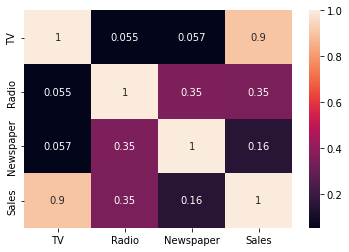

In [18]:
sns.heatmap(text.corr(), annot=True)

In [19]:
X=text['Radio']
y=text['Sales']
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Radio
74,1.0,24.6
3,1.0,41.3
185,1.0,45.1
26,1.0,29.3
90,1.0,4.9


In [20]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    12.164674
Radio     0.123920
dtype: float64

In [21]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           5.36e-05
Time:                        17:52:10   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

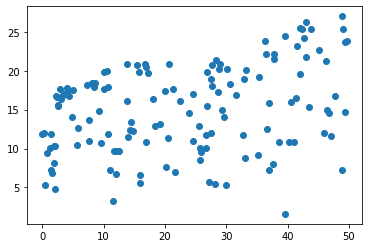

In [22]:
plt.scatter(X_train, y_train)

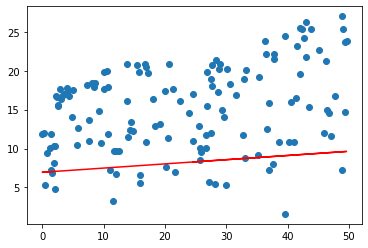

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train,'r')
plt.show()

In [24]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

74     15.213103
3      17.282565
185    17.753460
26     15.795526
90     12.771882
         ...    
87     17.195821
103    14.296096
67     13.961512
24     13.726065
8      12.424906
Length: 140, dtype: float64

In [25]:
residual=y_train-y_train_pred
residual

74     1.786897
3     -0.782565
185    4.846540
26    -0.795526
90     1.228118
         ...   
87    -1.195821
103    5.403904
67    -0.561512
24    -4.026065
8     -7.624906
Length: 140, dtype: float64

<Figure size 432x288 with 0 Axes>

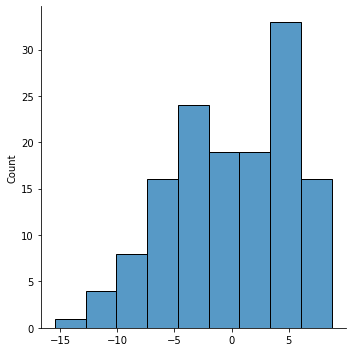

In [26]:
plt.figure()
sns.displot(residual)

Text(0.5, 1.0, 'Residual Plot')

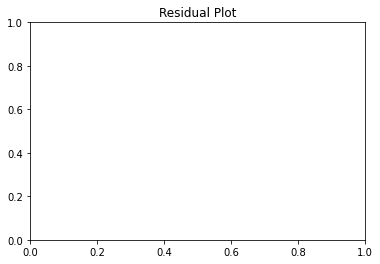

In [27]:
plt.title("Residual Plot")

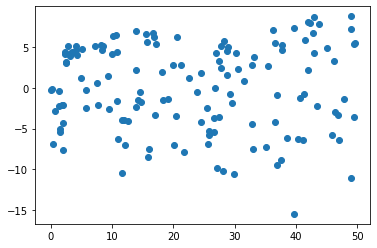

In [28]:
plt.scatter(X_train, residual)
plt.show()